Generate samples for negative control ->
 - 1 variation, ground truth, original antigen (A), antibody (L, H)
 - 1 variation, collect residue numbers in range of epitope, and scramble amino acid sequences in the antibody chain
 - 1 variation, collect same length of H, and L chains as original structure, and replace

Input each variation into Rosettafold 3, and generate samples for entire dataset
This will be used to test if the models are generating fake folding

In [1]:
import os
import incito_pipeline.util.extract.csv_extract as csv_e

path_to_fv = "/spinning1/sharedby/hz362/dataset/oas/sequence/processed/oas_paired_AbNGS_80_seq_id_no_singleton.csv"
dataset_save_fv = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/dataset/chains/length_map_fv.parquet"

csv_e.create_length_index(path_to_fv, dataset_save_fv, seq_columns_remap={'vh_seq': 'H_len', 'vl_seq': 'L_len'},)

Reading database from /spinning1/sharedby/hz362/dataset/oas/sequence/processed/oas_paired_AbNGS_80_seq_id_no_singleton.csv
Index(['rep_id', 'vh_seq', 'vl_seq', 'concat_seq'], dtype='object')
   rep_id                                             vh_seq  \
0       0  EVQLVQAGAEVKKPGESLKISCVGSGYTFANYWIGWVRQVPGKGLE...   
1      11  EVQLLESGGGLVQPGGSLRLSCVVSRFSFSSYDMSWVRQGPGEGLE...   
2      26  QEQLLESGPGLVKPSETLFLTCSVSSGASSGYYWSWIRQPPGKGLE...   
3      28  QVQLQQWGAGLLKPSETLSLTCAVSGGSFSGDYWSWIRQPPGKGLE...   
4      39  EVQLVESGGGLVQPDKSLKLSCAASGFNFSGSAIHWVRQAPGKGLE...   

                                              vl_seq  \
0  DIQLTQSPSTLSASVGDRVTISCRASQSIGTWLAWYQQKPGEAPAL...   
1  EIVLTQSPGTLSLSPGERATLSCRASQSVSNWYLAWYQQKPGQAPR...   
2  DIQMTQSPSSLSASVGDRVTITCQASQDINKFLNWYQQKPGQAPKL...   
3  DIQMTQSPSSLSASVGDRVTITCQASQDIRNFLNWWQQKPGKAPKV...   
4  DIQLTQSPSSLSASVGDRVTITCQASQDIRNFLNWWQQKPGKAPKV...   

                                          concat_seq  
0  EVQLVQAGAEVKKPGESLKISCVGSGYTF

In [2]:
import os
import incito_pipeline.util.extract.csv_extract as csv_e

path_to_vhhs = "/spinning1/sharedby/hz362/dataset/oas/sequence/original/oas_vhh.csv"
dataset_save_vhhs = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/dataset/chains/length_map_vhh.parquet"

import cupy as cp

cp.cuda.Device(1).use()

csv_e.create_length_index(path_to_vhhs, dataset_save_vhhs, seq_columns_remap={'vhh_seq': 'H_len'})

Reading database from /spinning1/sharedby/hz362/dataset/oas/sequence/original/oas_vhh.csv


Index(['ID', 'vhh_seq'], dtype='object')
                       ID                                            vhh_seq
0  externalcollab_9152179  QVQLVESGGGLVQAGASLRLSCAASGRTFSDYAMAWYRQAPGKQRE...
1  externalcollab_6267234  EVQLVESGGGLVQAGGSLRLSCAASGRAFSDYGMGWFRQAPGKQHE...
2  externalcollab_9556874  QVKLEESGGGLVQAGGSLRLSCAASGLSFSRYAMGWFRQAPGKERE...
3            INDI_6303644  QVQLVESGGGLVQAGGSLRLSCAPSGSIFNINAMGWYRQAPGKERE...
4            INDI_1613319  QVQLVESGGGSVQPGGSLRLSCAASGSPLNYYHIGWFRQAPGKERE...
Index(['ID', 'vhh_seq', 'H_len', 'row_index'], dtype='object')
Saved length index to /home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/dataset/chains/length_map_vhh.parquet


In [4]:
import os
import incito_pipeline.util.parse.yaml_parse as yaml_p
import incito_pipeline.util.samples.date_filter as df
import incito_pipeline.util.cache as cache


path_to_pdb = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth"
save_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/yaml/gt/fv"

c = cache.Cache(pickle_name="date_cutoff_fv")

if c.is_pickle():
    print('loading from dir')
    pdb_dirs = c.load_pickle()
else:
    pdb_dirs = df.get_pdb_dirs_by_date(path_to_pdb)
    c.save_pickle(pdb_dirs)

yaml_p.build_yaml_from_files(pdb_dirs, save_dir, chain_map={"A":"A", "H":"H", "L":"L"})

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/date_cutoff_fv.pkl -> True
loading from dir
# Building YAML from database files
# Building YAML from PDB file: /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth/9cqa_D1-124_G1-108.pdb
# Building YAML from PDB file: /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth/8udr_D21-143_E23-132.pdb
# Building YAML from PDB file: /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth/8yx1_A0-119_B1-107.pdb
# Building YAML from PDB file: /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth/8wsp_B1-123_C2-109.pdb
# Building YAML from PDB file: /home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth/8v5l_H1-121_L1-108.pdb
# Building YAML from PDB file: /ho

In [3]:
import os
import incito_pipeline.util.parse.yaml_parse as yaml_p
import incito_pipeline.util.samples.date_filter as df
import incito_pipeline.util.cache as cache

path_to_pdb = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth"
save_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/yaml/gt/vhh"

c = cache.Cache(pickle_name="date_cutoff_vhh")

if c.is_pickle():
    print('loading from dir')
    pdb_dirs = c.load_pickle()
else:
    pdb_dirs = df.get_pdb_dirs_by_date(path_to_pdb)
    c.save_pickle(pdb_dirs)
print(pdb_dirs)

yaml_p.build_yaml_from_files(pdb_dirs, save_dir, chain_map={"A":"A", "H":"H"})

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/date_cutoff_vhh.pkl -> True
loading from dir
['/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8th4_B4-115_NA.pdb', '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/9g5z_C5-119_NA.pdb', '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/9fzq_B4-126_NA.pdb', '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8rwf_C1-118_NA.pdb', '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/8qf4_E3-128_NA.pdb', '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/9fzd_B5-122_NA.pdb', '/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth/9fz

In [3]:
import os
import datetime as dt

import incito_pipeline.util.samples.negative_control as nc
import incito_pipeline.util.samples.date_filter as df
import incito_pipeline.util.cache as cache

model_training_cutoff = dt.datetime(2023, 1, 6)

path_to_pdb = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth"
save_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/yaml"

c = cache.Cache(pickle_name="date_cutoff_fv")

if c.is_pickle():
    print('loading from dir')
    pdb_fv_dirs = c.load_pickle()
else:
    pdb_fv_dirs = df.get_pdb_dirs_by_date(path_to_pdb, model_training_cutoff)
    c.save_pickle(pdb_fv_dirs)

for dir in pdb_fv_dirs:
    nc.create_negative_control_scramble_yaml(
        dir,
        os.path.join(save_dir, "scramble/fv"),
        cutoff_distance=10.0
    )

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/date_cutoff_fv.pkl -> True
loading from dir
Sorting chains with filters: ['H', 'L'] and ['A']
2 chains with C-alpha atoms extracted, using filter ['H', 'L'].
1 chains with C-alpha atoms extracted, using filter ['A'].
Found 130 epitope residues in the antibody chains.
Scrambling <Bio.SeqIO.PdbIO.PdbSeqresIterator object at 0x7f767c62ff80> records
Attempting to map residues
Residue epitope_residue(chain_id='H', residue_number=165, real_residue_number=1, residue_name='GLN') does not match chain A, skipping.
Residue epitope_residue(chain_id='H', residue_number=166, real_residue_number=1, residue_name='GLN') does not match chain A, skipping.
Residue epitope_residue(chain_id='H', residue_number=167, real_residue_number=1, residue_name='GLN') does not match chain A, skipping.
Residue epitope_residue(chain_id='H', residue_number=165, real_residue_number=2, 

In [5]:
import os
import datetime as dt

import incito_pipeline.util.samples.negative_control as nc
import incito_pipeline.util.samples.date_filter as df
import incito_pipeline.util.cache as cache

model_training_cutoff = dt.datetime(2023, 1, 6)

path_to_pdb = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth"
save_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/yaml"

c = cache.Cache(pickle_name="date_cutoff_vhhs")

if c.is_pickle():
    print('loading from dir')
    pdb_vhhs_dirs = c.load_pickle()
else:
    pdb_vhhs_dirs = df.get_pdb_dirs_by_date(path_to_pdb, model_training_cutoff)
    c.save_pickle(pdb_vhhs_dirs)

for dir in pdb_vhhs_dirs:
    nc.create_negative_control_scramble_yaml(
        dir,
        os.path.join(save_dir, "scramble/vhhs"),
        cutoff_distance=10.0
    )

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/date_cutoff_vhhs.pkl -> False
Querying https://data.rcsb.org/rest/v1/core/entry/8TH4
Appending 8th4, date: 2023-07-13T00:00:00+0000, cutoff_date: 2023-01-06 00:00:00
Querying https://data.rcsb.org/rest/v1/core/entry/8FCZ
Querying https://data.rcsb.org/rest/v1/core/entry/8EMZ
Querying https://data.rcsb.org/rest/v1/core/entry/9G5Z
Appending 9g5z, date: 2024-07-17T00:00:00+0000, cutoff_date: 2023-01-06 00:00:00
Querying https://data.rcsb.org/rest/v1/core/entry/7TE8
Querying https://data.rcsb.org/rest/v1/core/entry/9FZQ
Appending 9fzq, date: 2024-07-05T00:00:00+0000, cutoff_date: 2023-01-06 00:00:00
Querying https://data.rcsb.org/rest/v1/core/entry/8EN2
Querying https://data.rcsb.org/rest/v1/core/entry/8RWF
Appending 8rwf, date: 2024-02-04T00:00:00+0000, cutoff_date: 2023-01-06 00:00:00
Querying https://data.rcsb.org/rest/v1/core/entry/8QF4
Appending 8q

In [1]:
import os
import datetime as dt
import cupy as cp

import incito_pipeline.util.samples.negative_control as nc
import incito_pipeline.util.cache as cache
import incito_pipeline.util.samples.date_filter as dfilter

path_to_pdb_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth"
save_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/yaml/"
path_to_id_dataset = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/dataset/chains/length_map_fv.parquet"
path_to_dataset = "/spinning1/sharedby/hz362/dataset/oas/sequence/processed/oas_paired_AbNGS_80_seq_id_no_singleton.csv"

c = cache.Cache(pickle_name="date_cutoff_fv")

model_training_cutoff = dt.datetime(2023, 1, 6)

if c.is_pickle():
    print('loading from dir')
    pdb_dirs = c.load_pickle()
else:
    pdb_dirs = dfilter.get_pdb_dirs_by_date(path_to_pdb_dir, model_training_cutoff)
    c.save_pickle(pdb_dirs)

cp.cuda.Device(1).use()

nc.create_negative_control_dataset_replace_dir(
    pdb_dirs,
    os.path.join(save_dir, "random_chain/fv"),
    path_to_id_dataset=path_to_id_dataset,
    path_to_dataset=path_to_dataset,
    chains_to_replace={"H": "vh_seq", "L": "vl_seq"},
    seq_columns=["H_len", "L_len"],
)

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/date_cutoff_fv.pkl -> True
loading from dir
Getting parquet datafile:  /home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/dataset/chains/length_map_fv.parquet
Writing records for negative control chain swap for pdb: 9cqa_D1-124_G1-108
Passing in lengths: (124, 108)
<class 'list'>
[116, 131, 138, 172, 199, 247, 281, 331, 385, 400, 646, 670, 896, 1105, 1141, 1266, 1292, 1309, 1361, 1375, 1426, 1427, 1442, 1470, 1481, 1492, 1530, 1548, 1620, 1715, 1747, 1767, 1772, 1824, 1850, 1867, 2034, 2045, 2051, 2151, 2163, 2290, 2301, 2395, 2463, 2558, 2626, 2876, 3044, 3257, 3264, 3293, 3338, 3374, 3429, 3471, 3484, 3544, 3626, 3764, 3774, 3921, 3975, 4023, 4094, 4104, 4115, 4159, 4184, 4273, 4285, 4322, 4534, 4624, 4641, 4680, 4812, 4899, 5075, 5109, 5137, 5284, 5312, 5384, 5407, 5672, 5685, 5748, 5894, 5973, 6106, 6149, 6268

In [1]:
import os
import datetime as dt
import cupy as cp

import incito_pipeline.util.samples.negative_control as nc
import incito_pipeline.util.cache as cache
import incito_pipeline.util.samples.date_filter as dfilter

path_to_pdb_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth"
save_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/yaml/"
path_to_id_dataset = "/home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/dataset/chains/length_map_vhh.parquet"
path_to_dataset = "/spinning1/sharedby/hz362/dataset/oas/sequence/original/oas_vhh.csv"

c = cache.Cache(pickle_name="date_cutoff_vhh")

model_training_cutoff = dt.datetime(2023, 1, 6)

if c.is_pickle():
    print('loading from dir')
    pdb_dirs = c.load_pickle()
else:
    pdb_dirs = dfilter.get_pdb_dirs_by_date(path_to_pdb_dir, model_training_cutoff)
    c.save_pickle(pdb_dirs)

num_gpus = cp.cuda.runtime.getDeviceCount()


cp.cuda.Device(1).use()

nc.create_negative_control_dataset_replace_dir(
    pdb_dirs,
    os.path.join(save_dir, "random_chain/vhh"),
    path_to_id_dataset=path_to_id_dataset,
    path_to_dataset=path_to_dataset,
    chains_to_replace={"H": "vhh_seq"},
    seq_columns=["H_len"],
)

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/date_cutoff_vhh.pkl -> True
loading from dir
Getting parquet datafile:  /home/cp864/repos/incito-pipeline/incito_pipeline/model_outputs/boltz_2_new/19_08_2025/dataset/chains/length_map_vhh.parquet
Writing records for negative control chain swap for pdb: 8th4_B4-115_NA
Passing in lengths: (118,)
Selected target id: 12330938
Replaced H sequences: EVQLVESGGGLVQPGGSLRLSCAASGYIYSRYRMGWYRQAPGKGREFVAAISGGSSTNYADSVKGRFTISRDNSKNTVYLQMNSLRAEDTAVYYCAAYKIDSNPRVYWGQGTQVTVSS -> QLQLVESGGGLVQAGGSLRLSCAVSGGTFSTYAMAWSRQAPGEEREFVAGVSWAGGTTRYADSVKGRFTISRDNAKKTIYLQMNDLKPEDTAVYYCAAGLGMKWSDFWGQGTQVTVSS
Original chain length: 118, new chain length: 118, difference: 0

Writing records for negative control chain swap for pdb: 9g5z_C5-119_NA
Passing in lengths: (117,)
Selected target id: 7604621
Replaced H sequences: QVQLQESGGGLVQPGGSLRLSCAASGFTFSSYDMSWVRQAPGKGLEWVSAINRGGGST

In [1]:
# Converting .cif files to .pdb files:
import os
import incito_pipeline.util.parse.pdb as pdb_p

generic_src_dir = "/spinning1/home/cp864/boltz_2_new/19_08_2025/output"

dir_list = [("gt/fv/boltz_results_fv/predictions", "gt/fv/pdb"),
            ("gt/vhh/boltz_results_vhh/predictions", "gt/vhh/pdb"),
            ("random_chain/fv/boltz_results_fv/predictions", "random_chain/fv/pdb"),
            ("random_chain/vhh/boltz_results_vhh/predictions", "random_chain/vhh/pdb"),
            ("scramble/fv/boltz_results_fv/predictions", "scramble/fv/pdb"),
            ("scramble/vhh/boltz_results_vhh/predictions", "scramble/vhh/pdb"),]

for src, dest in dir_list:
    src = os.path.join(generic_src_dir, src)
    dest = os.path.join(generic_src_dir, dest)

    os.makedirs(dest, exist_ok=True)
    print(f"Converting {src} -> {dest}")
    
    pdb_p.convert_pdb_from_cif_dataset(src, dest, override=False, simplify_name=True)


Converting /spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/boltz_results_fv/predictions -> /spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/pdb
/spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/boltz_results_fv/predictions/8g8d_A1-127_B2-110
['8g8d_A1-127_B2-110_model_0.cif']
Skipping, file already exists.
  Converted 8g8d_A1-127_B2-110_model_0.cif to PDB format and saved to /spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/pdb/8g8d_A1-127_B2-110
/spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/boltz_results_fv/predictions/8vc7_B4-125_A2-109
['8vc7_B4-125_A2-109_model_0.cif']
Skipping, file already exists.
  Converted 8vc7_B4-125_A2-109_model_0.cif to PDB format and saved to /spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/pdb/8vc7_B4-125_A2-109
/spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/boltz_results_fv/predictions/8pmz_B1-123_B143-250
['8pmz_B1-123_B143-250_model_0.cif']
Skipping, file already exists.
  Converted 8pm

# Graphing

/spinning1/scratch/cp864/miniforge3/envs/incito-py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/fv_dockq_scores_gt.pkl -> True
79 dockq scores calculated, 17 failed
Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/vhh_dockq_scores_gt.pkl -> True
80 dockq scores calculated, 0 failed


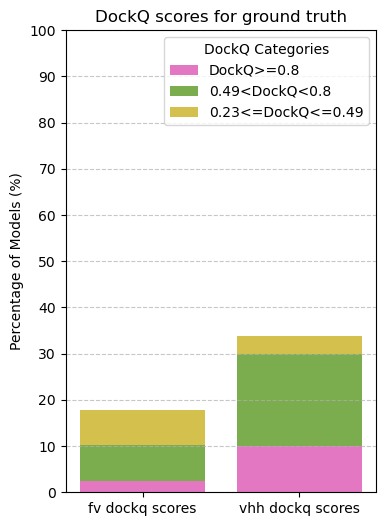

In [1]:
import incito_pipeline.util.dockq_utility as dqu
import incito_pipeline.util.data_utility as du
import incito_pipeline.util.plotting as plt

import incito_pipeline.util.cache as c

stratized = {}

def dq_fn(path_1: str, 
          path_2: str):
    pairs = du.pairs_pdbs(path_1, path_2)
    full_results, dockq_scores, failed_count, names = dqu.get_dockq_score_from_pairs(pairs)
    return full_results, dockq_scores, failed_count

fv_gt_generated_pdbs_dir = "/spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/fv/pdb"
fv_gt_original_pdbs_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth"

full_results, dockq_scores, failed_count = c.c_template("fv_dockq_scores_gt", dq_fn, fv_gt_original_pdbs_dir, fv_gt_generated_pdbs_dir)
print(f"{len(dockq_scores)} dockq scores calculated, {failed_count} failed")

stratized["fv dockq scores"] = du.stratize_data(dockq_scores)



vhh_gt_original_pdbs_dir = "/spinning1/home/cp864/boltz_2_new/19_08_2025/output/gt/vhh/pdb"
vhh_gt_generated_pdbs_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth"

full_results, dockq_scores, failed_count = c.c_template("vhh_dockq_scores_gt", dq_fn, vhh_gt_original_pdbs_dir, vhh_gt_generated_pdbs_dir)
print(f"{len(dockq_scores)} dockq scores calculated, {failed_count} failed")

stratized["vhh dockq scores"] = du.stratize_data(dockq_scores)

plt.plot_stacked_bar_chart(stratized, title="DockQ scores for ground truth")


# Benchmark for full chain scrambling generation

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/fv_dockq_scores_random_chain.pkl -> True
96 dockq scores calculated, 0 failed
Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/vhh_dockq_scores_random_chain.pkl -> True
80 dockq scores calculated, 0 failed


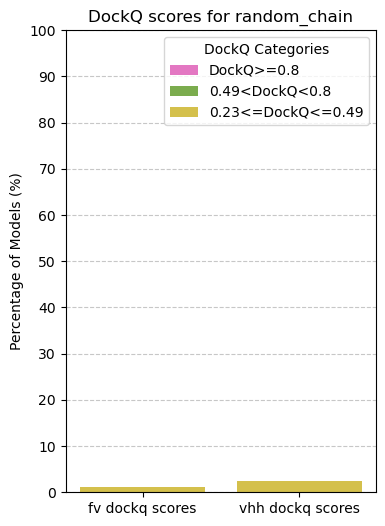

In [2]:
import incito_pipeline.util.dockq_utility as dqu
import incito_pipeline.util.data_utility as du
import incito_pipeline.util.plotting as plt

import incito_pipeline.util.cache as c

stratized = {}

def dq_fn(path_1: str, 
          path_2: str):
    pairs = du.pairs_pdbs(path_1, path_2)
    full_results, dockq_scores, failed_count, names = dqu.get_dockq_score_from_pairs(pairs)
    return full_results, dockq_scores, failed_count

fv_generated_pdbs_dir = "/spinning1/home/cp864/boltz_2_new/19_08_2025/output/random_chain/fv/pdb"
fv_original_pdbs_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth"

full_results, dockq_scores, failed_count = c.c_template("fv_dockq_scores_random_chain", dq_fn, fv_original_pdbs_dir, fv_generated_pdbs_dir)
print(f"{len(dockq_scores)} dockq scores calculated, {failed_count} failed")
stratized["fv dockq scores"] = du.stratize_data(dockq_scores)

vhh_generated_pdbs_dir = "/spinning1/home/cp864/boltz_2_new/19_08_2025/output/random_chain/vhh/pdb"
vhh_original_pdbs_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth"

full_results, dockq_scores, failed_count = c.c_template("vhh_dockq_scores_random_chain", dq_fn, vhh_original_pdbs_dir, vhh_generated_pdbs_dir)
print(f"{len(dockq_scores)} dockq scores calculated, {failed_count} failed")
stratized["vhh dockq scores"] = du.stratize_data(dockq_scores)

plt.plot_stacked_bar_chart(stratized, title="DockQ scores for random_chain")



# Benchmark for epitope scrambling

Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/fv_dockq_scores_scramble.pkl -> True
96 dockq scores calculated, 0 failed
Initialized cache directory: /home/cp864/repos/incito-pipeline/cache
Checking if pickle exists at: /home/cp864/repos/incito-pipeline/cache/vhh_dockq_scores_scramble.pkl -> True
80 dockq scores calculated, 0 failed


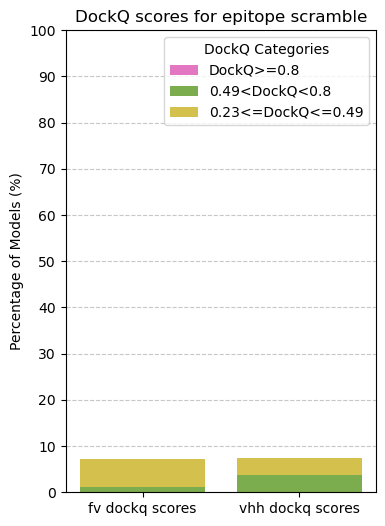

In [3]:
import incito_pipeline.util.dockq_utility as dqu
import incito_pipeline.util.data_utility as du
import incito_pipeline.util.plotting as plt

import incito_pipeline.util.cache as c

stratized = {}

def dq_fn(path_1: str, 
          path_2: str):
    pairs = du.pairs_pdbs(path_1, path_2)
    full_results, dockq_scores, failed_count, names = dqu.get_dockq_score_from_pairs(pairs)
    return full_results, dockq_scores, failed_count

fv_generated_pdbs_dir = "/spinning1/home/cp864/boltz_2_new/19_08_2025/output/scramble/fv/pdb"
fv_original_pdbs_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_Fv_GroundTruth"

full_results, dockq_scores, failed_count = c.c_template("fv_dockq_scores_scramble", dq_fn, fv_original_pdbs_dir, fv_generated_pdbs_dir)
print(f"{len(dockq_scores)} dockq scores calculated, {failed_count} failed")
stratized["fv dockq scores"] = du.stratize_data(dockq_scores)

vhh_generated_pdbs_dir = "/spinning1/home/cp864/boltz_2_new/19_08_2025/output/scramble/vhh/pdb"
vhh_original_pdbs_dir = "/home/cp864/repos/incito-pipeline/incito_pipeline/datasets/AF3_independent_test_VHHs_GroundTruth"

full_results, dockq_scores, failed_count = c.c_template("vhh_dockq_scores_scramble", dq_fn, vhh_original_pdbs_dir, vhh_generated_pdbs_dir)
print(f"{len(dockq_scores)} dockq scores calculated, {failed_count} failed")
stratized["vhh dockq scores"] = du.stratize_data(dockq_scores)

plt.plot_stacked_bar_chart(stratized, title="DockQ scores for epitope scramble")
